In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel(r"C:\Users\samee\Downloads\marketing_campaign1 (1) (1) (1).xlsx")
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [2]:
from sklearn.preprocessing import StandardScaler

# Drop unnecessary columns if they exist
cols_to_drop = [col for col in ['ID', 'Dt_Customer'] if col in df.columns]
df_clust = df.drop(columns=cols_to_drop)

# Handle missing income
df_clust['Income'] = df_clust['Income'].fillna(df_clust['Income'].median())

# Encode categorical features
df_clust = pd.get_dummies(df_clust, drop_first=True)

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clust)


In [3]:
from sklearn.cluster import DBSCAN

# You may tune eps and min_samples for better results
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['Cluster_DBSCAN'] = dbscan.fit_predict(scaled_data)


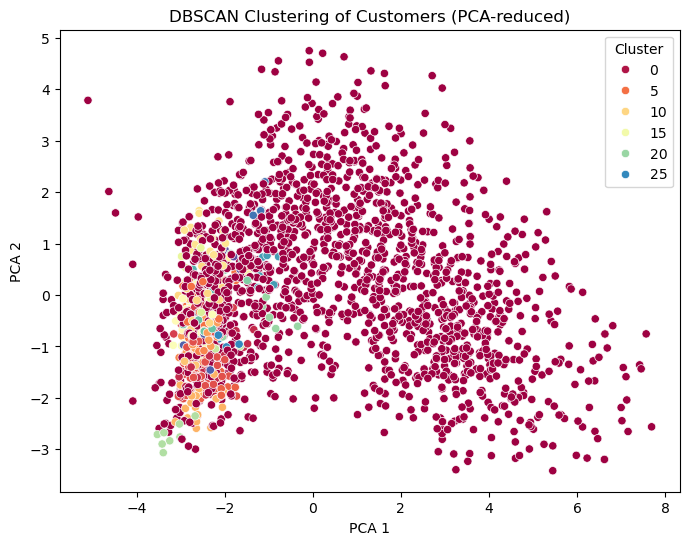

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=df['Cluster_DBSCAN'], palette='Spectral')
plt.title("DBSCAN Clustering of Customers (PCA-reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()


In [5]:
# Select only numeric columns for aggregation
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols].groupby(df['Cluster_DBSCAN']).mean()


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Cluster_DBSCAN
Cluster_DBSCAN,,,,,,,,,,,,,,,,,,,,,
-1,5570.488987,1967.636013,56711.485841,0.34141,0.545705,48.435573,367.899780,31.599670,201.577643,44.957048,...,0.089758,0.09196,0.089758,0.079295,0.01652,0.011564,3.0,11.0,0.183921,-1.0
0,3559.400000,1959.400000,46472.750000,1.00000,1.000000,32.800000,21.800000,1.800000,10.400000,3.400000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,3.0,11.0,0.000000,0.0
1,6659.804348,1978.108696,31543.173913,1.00000,0.000000,55.413043,26.369565,3.326087,20.260870,7.195652,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,3.0,11.0,0.000000,1.0
2,5917.941176,1977.000000,34536.588235,1.00000,0.000000,34.117647,37.411765,1.823529,19.705882,1.823529,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,3.0,11.0,0.000000,2.0
3,5133.735294,1978.852941,28891.253731,1.00000,0.000000,49.147059,16.411765,5.544118,22.235294,8.735294,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,3.0,11.0,0.000000,3.0
4,4761.083333,1988.416667,22477.416667,0.00000,0.000000,41.250000,16.250000,5.250000,22.083333,9.916667,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,3.0,11.0,0.000000,4.0
5,5765.648649,1967.864865,37651.750000,1.00000,1.000000,48.027027,45.297297,2.648649,17.432432,4.432432,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,3.0,11.0,0.000000,5.0
6,6123.526316,1979.842105,25684.055556,1.00000,0.000000,54.631579,10.052632,7.473684,14.315789,8.210526,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,3.0,11.0,0.000000,6.0
7,6149.055556,1979.944444,30564.055556,1.00000,0.000000,46.000000,22.444444,2.722222,18.555556,2.722222,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,3.0,11.0,0.000000,7.0


In [6]:
df_clust['Cluster_DBSCAN'] = df['Cluster_DBSCAN']  # if not already added
df_clust.groupby('Cluster_DBSCAN').mean()


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
Cluster_DBSCAN,,,,,,,,,,,,,,,,,,,,,
-1,1967.636013,56667.460628,0.34141,0.545705,48.435573,367.899780,31.599670,201.577643,44.957048,32.535793,...,0.467511,0.17511,0.231278,0.001652,0.117841,0.354626,0.219714,0.261564,0.042401,0.001101
0,1959.400000,47454.500000,1.00000,1.000000,32.800000,21.800000,1.800000,10.400000,3.400000,1.000000,...,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
1,1978.108696,31543.173913,1.00000,0.000000,55.413043,26.369565,3.326087,20.260870,7.195652,3.869565,...,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
2,1977.000000,34536.588235,1.00000,0.000000,34.117647,37.411765,1.823529,19.705882,1.823529,1.000000,...,0.000000,0.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
3,1978.852941,29221.992647,1.00000,0.000000,49.147059,16.411765,5.544118,22.235294,8.735294,5.500000,...,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
4,1988.416667,22477.416667,0.00000,0.000000,41.250000,16.250000,5.250000,22.083333,9.916667,6.416667,...,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
5,1967.864865,38022.824324,1.00000,1.000000,48.027027,45.297297,2.648649,17.432432,4.432432,3.000000,...,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
6,1979.842105,27036.552632,1.00000,0.000000,54.631579,10.052632,7.473684,14.315789,8.210526,6.421053,...,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
7,1979.944444,30564.055556,1.00000,0.000000,46.000000,22.444444,2.722222,18.555556,2.722222,1.833333,...,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
df['Persona'] = df['Cluster_DBSCAN'].map({
    -1: "Premium Elite",
     0: "Passive Customers",
     1: "Value Hunters",
     2: "Weekend Indulgers",
     3: "Savvy Shoppers",
     4: "Emerging Millennials"
})


In [8]:
spend_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
              'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Compute mean spend per cluster
cluster_spend = df.groupby('Cluster_DBSCAN')[spend_cols].mean().round(2)


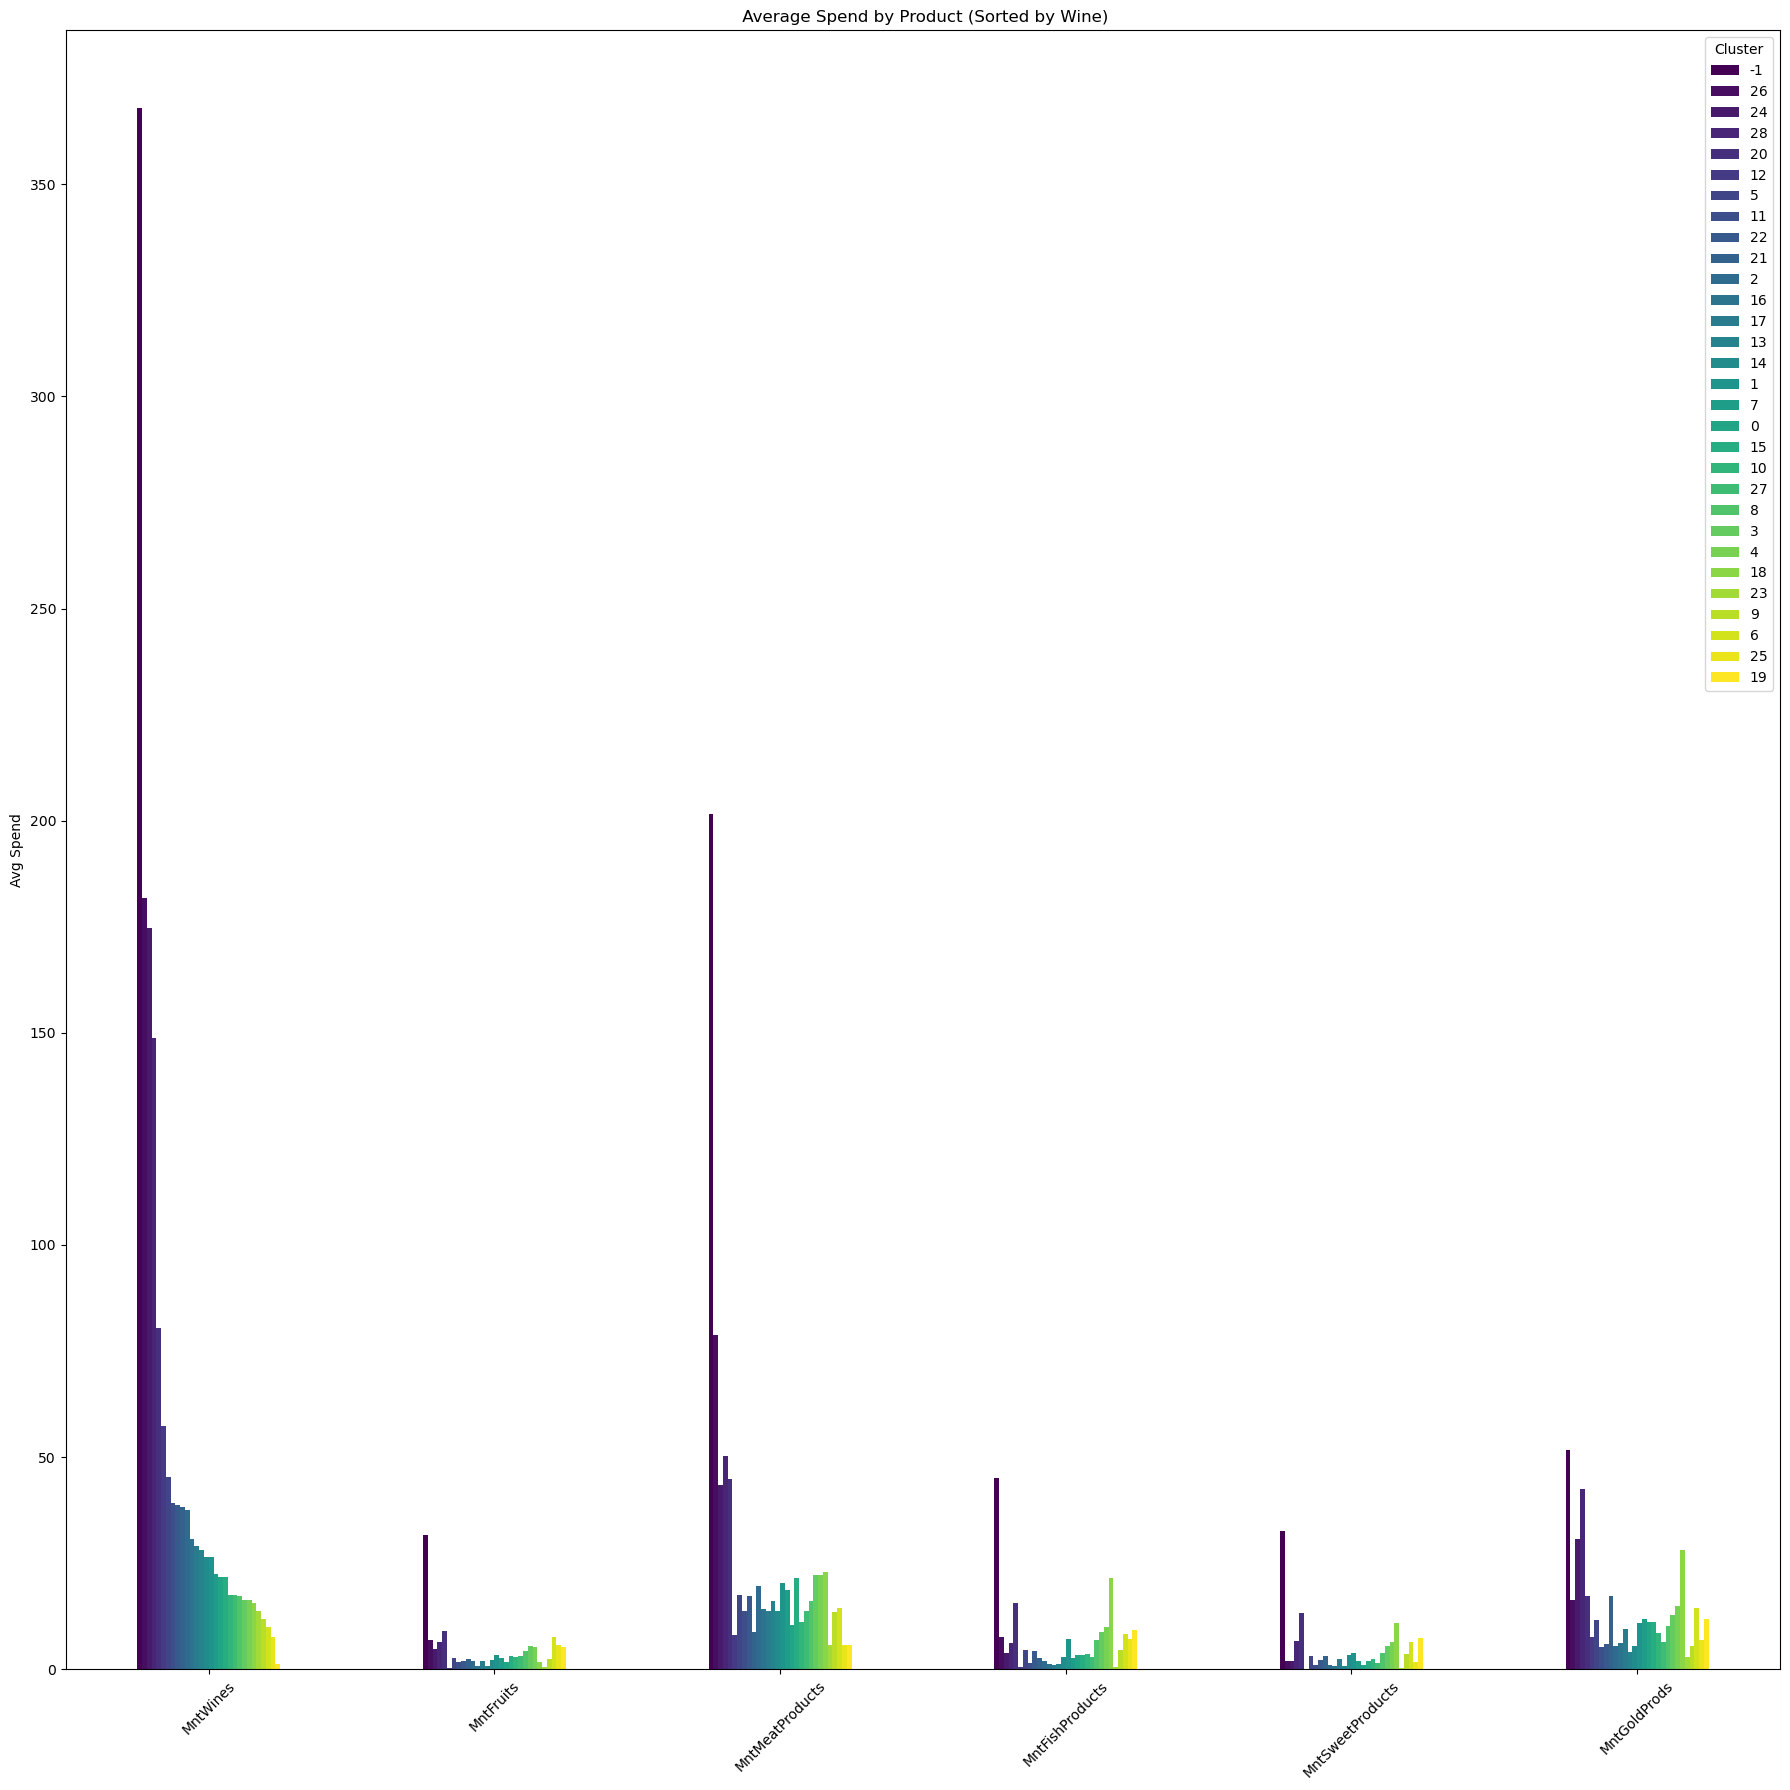

In [9]:
# Sort clusters by average wine spending
sorted_clusters = cluster_spend.sort_values('MntWines', ascending=False)

# Plot sorted
sorted_clusters.T.plot(kind='bar', figsize=(18, 18), colormap='viridis')
plt.title(" Average Spend by Product (Sorted by Wine)")
plt.ylabel("Avg Spend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Cluster')
plt.show()


In [10]:
spend_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
              'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

cluster_summary = df.groupby('Persona')[spend_cols + ['Income', 'Recency']].mean().round(2)


C:\Users\samee\AppData\Local\Temp\ipykernel_1272\3907872755.py:15: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\samee\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


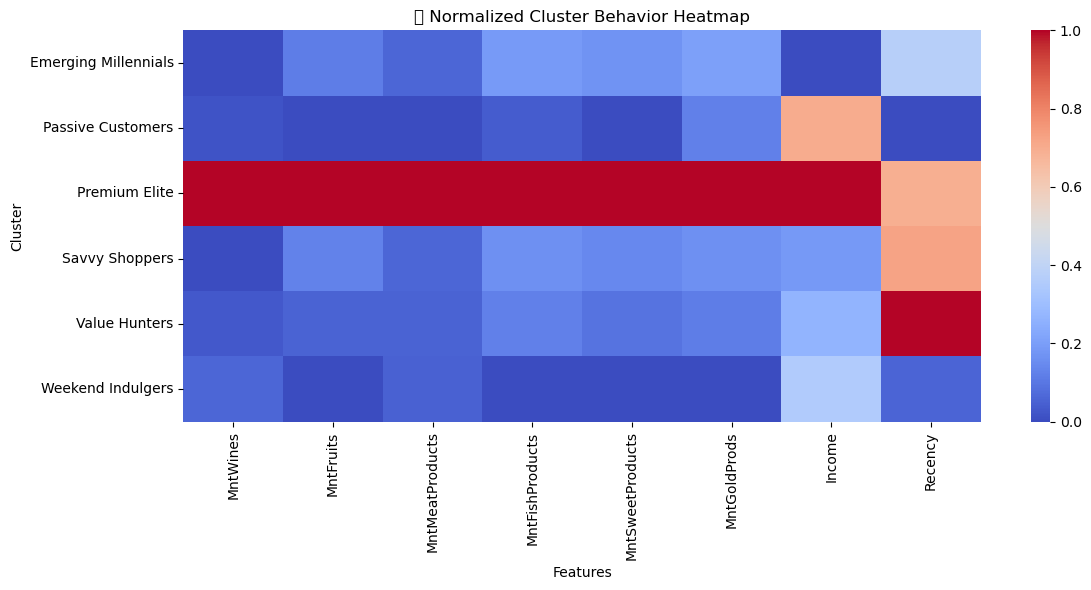

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_summary = pd.DataFrame(
    scaler.fit_transform(cluster_summary),
    index=cluster_summary.index,
    columns=cluster_summary.columns
)

plt.figure(figsize=(12, 6))
sns.heatmap(scaled_summary, cmap='coolwarm', annot=False)
plt.title('📊 Normalized Cluster Behavior Heatmap')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.tight_layout()
plt.show()


In [12]:
# Make sure Dt_Customer is datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Create Year-Month column
df['YearMonth'] = df['Dt_Customer'].dt.to_period('M')

# Group by YearMonth and Persona, then calculate mean Recency
recency_trend = df.groupby(['YearMonth', 'Persona'])['Recency'].mean().unstack()


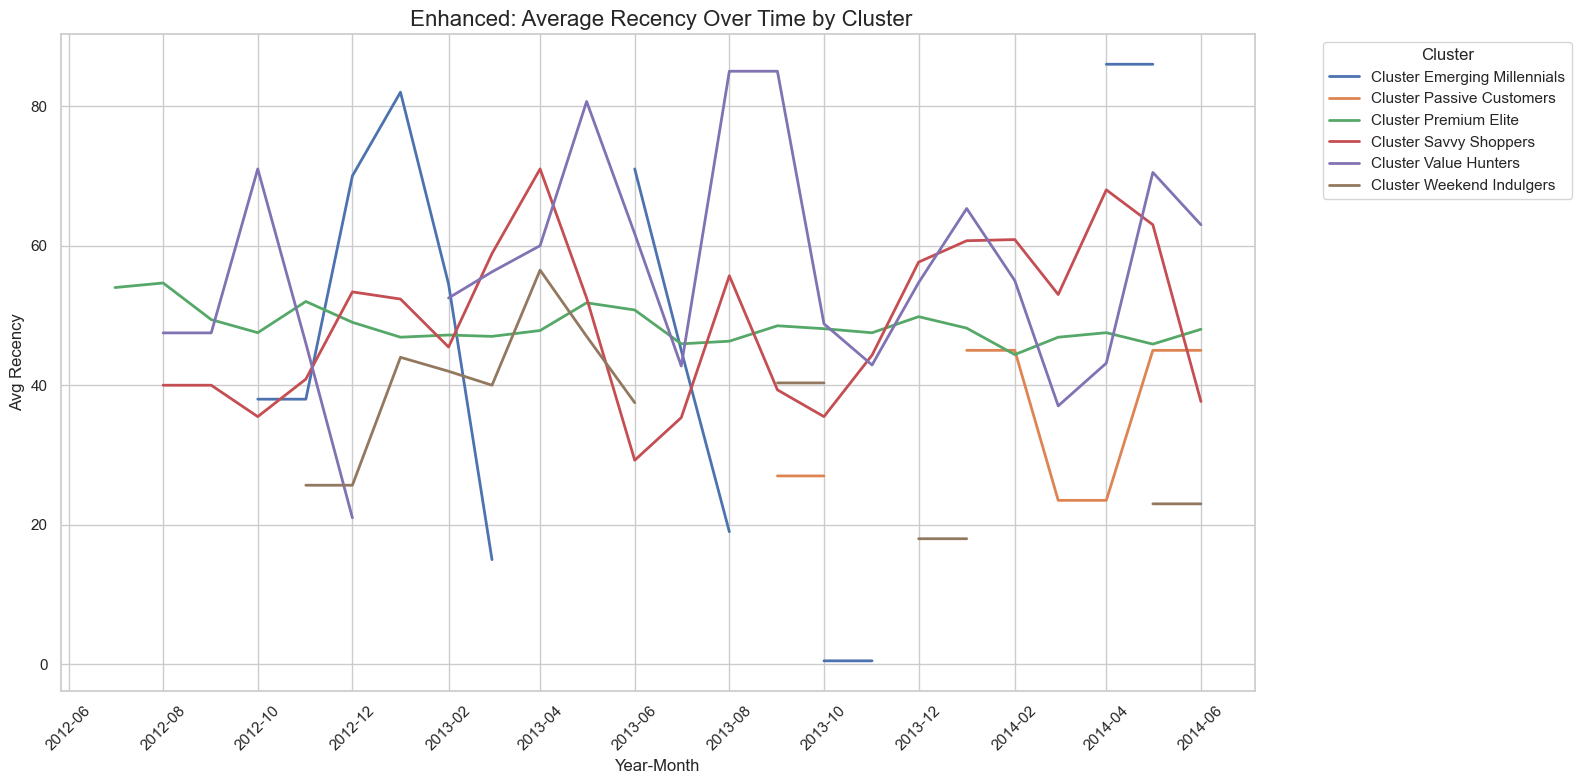

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Set a clean style
sns.set(style='whitegrid')

# If you want to apply smoothing:
recency_trend_smooth = recency_trend.rolling(window=2, min_periods=1).mean()

# Plot
plt.figure(figsize=(16, 8))

# Plot each cluster with a distinct color and style
for cluster in recency_trend.columns:
    plt.plot(recency_trend.index.to_timestamp(), 
             recency_trend_smooth[cluster], 
             label=f'Cluster {cluster}', 
             linewidth=2)

# Axis formatting
plt.title(" Enhanced: Average Recency Over Time by Cluster", fontsize=16)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Avg Recency", fontsize=12)

# Format the x-axis for better date ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45)

plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


In [14]:
df.groupby('Persona')[['Income', 'Recency'] + spend_cols].mean().style.background_gradient(cmap='YlGnBu')


,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Persona,,,,,,,,
Emerging Millennials,22477.416667,41.250000,16.250000,5.250000,22.083333,9.916667,6.416667,15.000000
Passive Customers,46472.750000,32.800000,21.800000,1.800000,10.400000,3.400000,1.000000,11.200000
Premium Elite,56711.485841,48.435573,367.899780,31.599670,201.577643,44.957048,32.535793,51.726322
Savvy Shoppers,28891.253731,49.147059,16.411765,5.544118,22.235294,8.735294,5.500000,12.882353
Value Hunters,31543.173913,55.413043,26.369565,3.326087,20.260870,7.195652,3.869565,10.891304
Weekend Indulgers,34536.588235,34.117647,37.411765,1.823529,19.705882,1.823529,1.000000,5.470588


In [15]:
# Calculate campaign acceptance rate per cluster
campaign_cols = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']
df[campaign_cols] = df[campaign_cols].apply(pd.to_numeric, errors='coerce')

df.groupby('Cluster_DBSCAN')[campaign_cols].mean().round(2)


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Cluster_DBSCAN,,,,,,
-1,0.08,0.02,0.09,0.09,0.09,0.18
0,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00


C:\Users\samee\AppData\Local\Temp\ipykernel_1272\215547546.py:16: UserWarning: Glyph 128233 (\N{ENVELOPE WITH DOWNWARDS ARROW ABOVE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\samee\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128233 (\N{ENVELOPE WITH DOWNWARDS ARROW ABOVE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


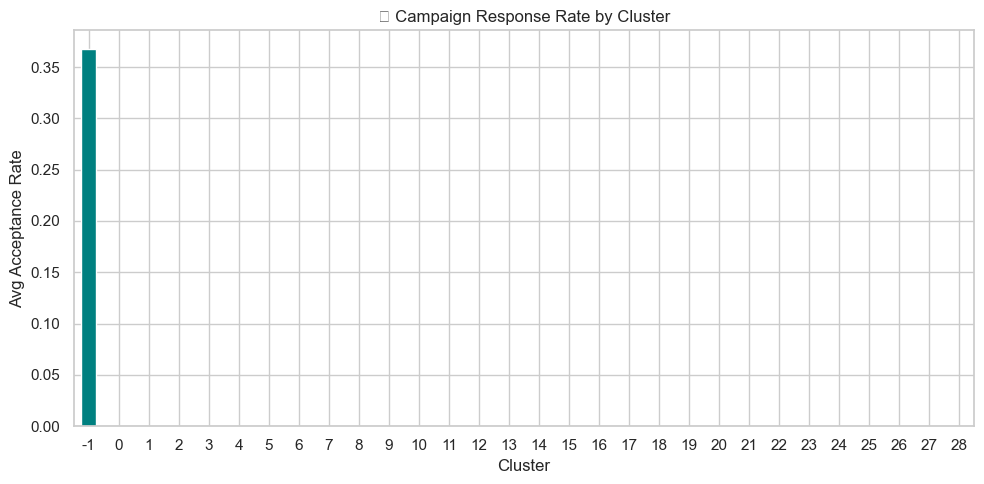

In [16]:
import matplotlib.pyplot as plt

# Average campaign response by cluster
campaign_cols = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']
cluster_response = df.groupby('Cluster_DBSCAN')[campaign_cols].mean()

# Total response (sum of all campaigns)
cluster_response['Total_Accepted'] = cluster_response[[col for col in campaign_cols if 'AcceptedCmp' in col]].sum(axis=1)

# Plot total response
cluster_response['Total_Accepted'].plot(kind='bar', figsize=(10, 5), color='teal')
plt.title("📩 Campaign Response Rate by Cluster")
plt.ylabel("Avg Acceptance Rate")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [17]:
# identifing and extract VIP customers

In [18]:
# Isolate Cluster -1
vip_df = df[df['Cluster_DBSCAN'] == -1].copy()

# Quick look
print(f"Total VIPs: {len(vip_df)}")
vip_df.head()


Total VIPs: 1816


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Cluster_DBSCAN,Persona,YearMonth
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,-1,Premium Elite,2012-09
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,-1,Premium Elite,2013-08
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,-1,Premium Elite,2014-01
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,0,0,0,0,3,11,0,-1,Premium Elite,2013-09
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,0,0,0,0,3,11,0,-1,Premium Elite,2012-11


In [19]:
# Profile VIP Behavior for Personalization

In [20]:
# Key behavior summary
vip_profile = vip_df[['Income', 'Recency', 'MntWines', 'MntFruits',
                      'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                      'MntGoldProds', 'NumWebVisitsMonth', 'Response']]

vip_profile.describe().T.round(2)


,count,mean,std,min,25%,50%,75%,max
Income,1801.0,56711.49,25470.51,1730.0,41551.0,57954.0,71604.00,666666.0
Recency,1816.0,48.44,29.32,0.0,23.0,49.0,73.25,99.0
MntWines,1816.0,367.90,343.17,0.0,63.0,279.0,574.25,1493.0
MntFruits,1816.0,31.60,42.40,0.0,2.0,13.5,43.00,199.0
MntMeatProducts,1816.0,201.58,237.56,0.0,27.0,106.0,292.00,1725.0
MntFishProducts,1816.0,44.96,58.13,0.0,4.0,19.0,65.00,259.0
MntSweetProducts,1816.0,32.54,44.03,0.0,2.0,13.0,44.00,263.0
MntGoldProds,1816.0,51.73,54.88,0.0,13.0,32.0,72.00,362.0
NumWebVisitsMonth,1816.0,5.01,2.51,0.0,3.0,5.0,7.00,20.0
Response,1816.0,0.18,0.39,0.0,0.0,0.0,0.00,1.0


In [21]:
# Design Targeted Campaign Criteria

In [22]:
# Define thresholds (you can tune these)
high_spenders = vip_df[vip_df['MntGoldProds'] > 100]
recent_buyers = vip_df[vip_df['Recency'] < 20]
active_online = vip_df[vip_df['NumWebVisitsMonth'] >= 5]

# Combine criteria
target_vips = high_spenders[high_spenders.index.isin(recent_buyers.index) & 
                            high_spenders.index.isin(active_online.index)]
print(f"High-priority VIPs: {len(target_vips)}")


High-priority VIPs: 25


In [23]:
target_vips.loc[:, 'Campaign_Message'] = (
    "Hi there! You're one of our most valued customers 💎 "
    "We've created an exclusive Gold Collection bundle just for you. "
    "Order now and enjoy early access perks. Limited-time offer!"
)



C:\Users\samee\AppData\Local\Temp\ipykernel_1272\3478874196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_vips.loc[:, 'Campaign_Message'] = (


In [24]:
# Save VIP target list for marketing team
target_vips[['ID', 'Income', 'Recency', 'Campaign_Message']].to_csv('VIP_Campaign_List.csv', index=False)


In [25]:
#Create Action Plans by Segment

In [26]:
segment_actions = {
    'Premium Elite': "Early access, luxury bundles, loyalty rewards",
    'Passive Customers': "Reactivation email with discount",
    'Value Hunters': "Bulk-buy deals, product bundles",
    'Weekend Indulgers': "Weekend flash sales",
    'Savvy Shoppers': "Referral rewards, curated offers",
    'Emerging Millennials': "Social-driven offers, mobile app onboarding"
}
persona_df = df[['ID', 'Persona']].copy()
persona_df['Suggested_Action'] = persona_df['Persona'].map(segment_actions)


In [27]:
df.to_csv("full_customer_segmentation.csv", index=False)


In [28]:
#A. Persona Summary Table

In [29]:
# Create a table with Persona and key stats
persona_stats = df.groupby('Persona')[['Income', 'Recency'] + spend_cols].mean().round(2)
persona_stats['Total_Spend'] = df.groupby('Persona')[spend_cols].sum().sum(axis=1)
display(persona_stats)


,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Spend
Persona,,,,,,,,,
Emerging Millennials,22477.42,41.25,16.25,5.25,22.08,9.92,6.42,15.00,899
Passive Customers,46472.75,32.80,21.80,1.80,10.40,3.40,1.00,11.20,248
Premium Elite,56711.49,48.44,367.90,31.60,201.58,44.96,32.54,51.73,1326218
Savvy Shoppers,28891.25,49.15,16.41,5.54,22.24,8.74,5.50,12.88,4849
Value Hunters,31543.17,55.41,26.37,3.33,20.26,7.20,3.87,10.89,3308
Weekend Indulgers,34536.59,34.12,37.41,1.82,19.71,1.82,1.00,5.47,1143


In [30]:
# B. Campaign Response Table by Persona

In [31]:
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

persona_response = df.groupby('Persona')[campaign_cols].mean().round(2)
persona_response['Total_Accepted'] = persona_response[[col for col in campaign_cols if 'AcceptedCmp' in col]].sum(axis=1)
display(persona_response)


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Total_Accepted
Persona,,,,,,,
Emerging Millennials,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Passive Customers,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Premium Elite,0.08,0.02,0.09,0.09,0.09,0.18,0.37
Savvy Shoppers,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Value Hunters,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Weekend Indulgers,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [32]:
#C. Strategic Action Mapping

In [33]:
# You can update this dictionary based on deeper insights
persona_actions = {
    'Premium Elite': 'Exclusive bundles, early access, VIP perks',
    'Passive Customers': 'Win-back campaigns, personalized offers',
    'Value Hunters': 'Discount-led product combos',
    'Weekend Indulgers': 'Weekend flash sales & targeted ads',
    'Savvy Shoppers': 'Cross-sells, loyalty programs',
    'Emerging Millennials': 'App push, gamified rewards'
}

df['Suggested_Action'] = df['Persona'].map(persona_actions)


In [34]:
report_cols = ['ID', 'Persona', 'Cluster_DBSCAN', 'Income', 'Recency'] + spend_cols + campaign_cols + ['Suggested_Action']
df[report_cols].to_csv("Customer_Segmentation_Report.csv", index=False)


In [35]:
#Iterate or Expand
#A. Try K-Means for Comparison

In [36]:
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

# Silhouette for DBSCAN (excluding noise points labeled -1)
labels_db = df['Cluster_DBSCAN']
sil_db = silhouette_score(scaled_data[labels_db != -1], labels_db[labels_db != -1])

# Silhouette for KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
labels_km = kmeans.fit_predict(scaled_data)
sil_km = silhouette_score(scaled_data, labels_km)

print(f"DBSCAN Silhouette Score: {sil_db:.2f}")
print(f"K-Means Silhouette Score: {sil_km:.2f}")


DBSCAN Silhouette Score: 0.36
K-Means Silhouette Score: 0.06


In [37]:
# 1.Executive Report: All-In-One Table

In [38]:
# Step 1: Summary Stats
persona_summary = df.groupby('Persona')[['Income', 'Recency'] + spend_cols].mean().round(2)

# Step 2: Total Spend
persona_summary['Total_Spend'] = df.groupby('Persona')[spend_cols].sum().sum(axis=1)

# Step 3: Campaign Response
campaign_cols = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']
persona_response = df.groupby('Persona')[campaign_cols].mean().round(2)

# Step 4: Strategic Action Mapping
actions = {
    'Premium Elite': ' VIP bundles & exclusive perks',
    'Passive Customers': ' Win-back email w/ discount',
    'Value Hunters': ' Bulk offers & pricing incentives',
    'Weekend Indulgers': ' Weekend flash sales',
    'Savvy Shoppers': ' Loyalty points or referrals',
    'Emerging Millennials': ' App onboarding + gamification'
}
df['Suggested_Action'] = df['Persona'].map(actions)

# Step 5: Export for Dashboard or Presentation
df.to_csv("Executive_Customer_Segmentation_Report.csv", index=False)


In [39]:
# 📦 Imports
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 🎯 Features and target
X = df_clust.drop(columns=['Response'])   # fully numeric preprocessed features
y = df['Response']                        # target: whether customer accepted a campaign

# 🔀 Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 🚀 Train XGBoost model
model = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# ✅ Evaluate performance
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

#  Feature importance
feature_importance = model.feature_importances_
features = X.columns
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f" Model Accuracy: {accuracy:.2%}")




C:\Users\samee\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:57:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       381
           1       0.76      0.42      0.54        67

    accuracy                           0.89       448
   macro avg       0.83      0.70      0.74       448
weighted avg       0.88      0.89      0.88       448

 Model Accuracy: 89.29%


In [40]:
import joblib

# Save the model
joblib.dump(model, 'xgboost_campaign_model.pkl')

# To load later:
# loaded_model = joblib.load('xgboost_campaign_model.pkl')


['xgboost_campaign_model.pkl']

In [41]:
features = ['Income', 'Recency', 'MntWines', 'MntMeatProducts', 
            'MntFishProducts', 'MntGoldProds', 'NumWebVisitsMonth']
joblib.dump(features, "model_features.pkl")


['model_features.pkl']

In [42]:
import joblib

joblib.dump(X.columns.tolist(), "model_features.pkl")


['model_features.pkl']

In [43]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load model and feature list
model = joblib.load("xgboost_campaign_model.pkl")
features = joblib.load("model_features.pkl")

st.set_page_config(page_title="Campaign Response Predictor", page_icon="📩")
st.title("🧠 Campaign Response Probability App")

st.markdown("Enter customer details below to predict campaign engagement probability:")

# Create input fields for each feature
input_data = {}
for feature in features:
    if "Mnt" in feature or "Income" in feature:
        input_data[feature] = st.number_input(f"{feature}", min_value=0.0, value=50.0)
    else:
        input_data[feature] = st.slider(f"{feature}", min_value=0, max_value=20, value=5)

# Convert to dataframe for prediction
input_df = pd.DataFrame([input_data])

# Predict on button click
if st.button("🔍 Predict Response Probability"):
    probability = model.predict_proba(input_df)[0][1]
    st.success(f"🎯 Response Probability: **{probability:.2%}**")
    
    if probability > 0.6:
        st.balloons()
        st.info("🔥 High likelihood of engagement. Prioritize this customer!")
    else:
        st.warning("📭 Lower probability—consider re-engagement strategies.")


2025-07-05 11:57:20.095 
  command:

    streamlit run C:\Users\samee\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-05 11:57:20.098 Session state does not function when running a script without `streamlit run`


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501